# Business understanding:

In this analysis, we'd like to explore the survey2017 of stackoverflow with three questions :
1. What kind of education type can let peopele to become professional developer ? 
2. What is the effective way to find professional developer job for people with doctor degree ?
3. Which company type should people with Phd degree get higher job satisfaction?

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/so-survey-2017/survey_results_schema.csv
/kaggle/input/so-survey-2017/survey_results_public.csv


In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns 
from collections import Counter
import matplotlib.pyplot as plt

# Data understanding and reading 

In [3]:
data = pd.read_csv('/kaggle/input/so-survey-2017/survey_results_public.csv')

In [4]:
list(data.columns)

['Respondent',
 'Professional',
 'ProgramHobby',
 'Country',
 'University',
 'EmploymentStatus',
 'FormalEducation',
 'MajorUndergrad',
 'HomeRemote',
 'CompanySize',
 'CompanyType',
 'YearsProgram',
 'YearsCodedJob',
 'YearsCodedJobPast',
 'DeveloperType',
 'WebDeveloperType',
 'MobileDeveloperType',
 'NonDeveloperType',
 'CareerSatisfaction',
 'JobSatisfaction',
 'ExCoderReturn',
 'ExCoderNotForMe',
 'ExCoderBalance',
 'ExCoder10Years',
 'ExCoderBelonged',
 'ExCoderSkills',
 'ExCoderWillNotCode',
 'ExCoderActive',
 'PronounceGIF',
 'ProblemSolving',
 'BuildingThings',
 'LearningNewTech',
 'BoringDetails',
 'JobSecurity',
 'DiversityImportant',
 'AnnoyingUI',
 'FriendsDevelopers',
 'RightWrongWay',
 'UnderstandComputers',
 'SeriousWork',
 'InvestTimeTools',
 'WorkPayCare',
 'KinshipDevelopers',
 'ChallengeMyself',
 'CompetePeers',
 'ChangeWorld',
 'JobSeekingStatus',
 'HoursPerWeek',
 'LastNewJob',
 'AssessJobIndustry',
 'AssessJobRole',
 'AssessJobExp',
 'AssessJobDept',
 'AssessJobT

In [5]:
data.LearnedHiring.value_counts()

A friend, family member, or former colleague told me                            6355
I was contacted directly by someone at the company (e.g. internal recruiter)    4255
A general-purpose job board                                                     3297
An external recruiter or headhunter                                             3185
I visited the company's Web site and found a job listing there                  2027
Some other way                                                                  1835
A career fair or on-campus recruiting event                                     1824
A tech-specific job board                                                        959
Name: LearnedHiring, dtype: int64

In [6]:
data.Professional.unique

<bound method Series.unique of 0                                                  Student
1                                                  Student
2                                   Professional developer
3        Professional non-developer who sometimes write...
4                                   Professional developer
                               ...                        
51387                               Professional developer
51388                                              Student
51389                               Professional developer
51390                               Professional developer
51391    Professional non-developer who sometimes write...
Name: Professional, Length: 51392, dtype: object>

To anwser the three questions,I went though the dataframe and tried to understand which columns make sense. 

# Handling missing values 
To calculate my results, I am not taking into account any missing values and ignoring them.

# Preparing data and evaluating results 


# **1. Education type to become professional developer :**

In [7]:
# to select the data who become professional developers
professionla_dev = data.loc[data.Professional == "Professional developer"]

In [8]:
# to show the information of professional developers' education type 
professionla_dev.EducationTypes.unique()

array(['Self-taught; Coding competition; Hackathon; Open source contributions',
       nan,
       'Online course; On-the-job training; Self-taught; Coding competition; Hackathon; Open source contributions',
       'Self-taught; Open source contributions',
       'Part-time/evening course; On-the-job training; Self-taught; Coding competition; Hackathon; Open source contributions',
       'Online course; Bootcamp; Industry certification; On-the-job training; Self-taught; Coding competition; Hackathon; Open source contributions',
       'On-the-job training; Self-taught; Coding competition; Open source contributions',
       'Self-taught; Hackathon', 'On-the-job training; Self-taught',
       'Online course; Industry certification; On-the-job training; Self-taught',
       'Self-taught',
       'Online course; Self-taught; Coding competition; Hackathon; Open source contributions',
       'Online course; Part-time/evening course; Self-taught; Coding competition',
       'Part-time/evening

In [9]:
# Since each row of the professional type column contains several strings, we need to split each string element to calculate 
educationtype = []
temp = professionla_dev.EducationTypes.drop(professionla_dev.loc[data.EducationTypes.isnull()].index)
for i in temp:
    if i is not None:
        types = i.replace(' ','').split(";")
        educationtype.extend(types)
print(Counter(educationtype))

Counter({'Self-taught': 20415, 'On-the-jobtraining': 10434, 'Onlinecourse': 9873, 'Opensourcecontributions': 8720, 'Hackathon': 5681, 'Codingcompetition': 4884, 'Industrycertification': 3672, 'Part-time/eveningcourse': 3364, 'Bootcamp': 2107})


Text(0.5, 1.0, 'Education types to become professional developers')

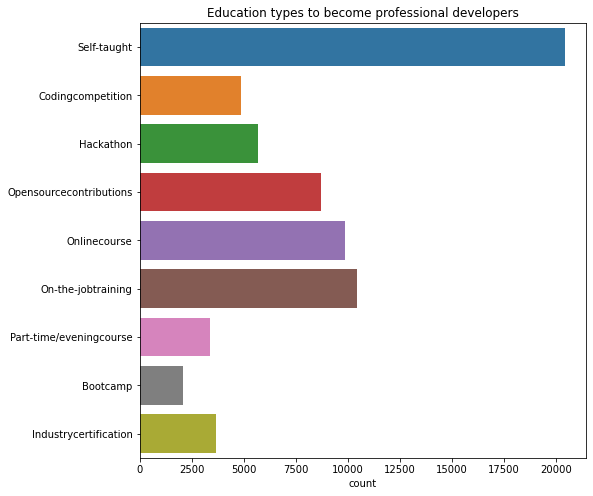

In [10]:
# to plot th bar and pie chart  to show the consistency of education type 
plt.subplots(figsize = (8,8))
sns.countplot(y = educationtype)
plt.title("Education types to become professional developers")

Text(0.5, 1.0, 'Education types to become professional developers')

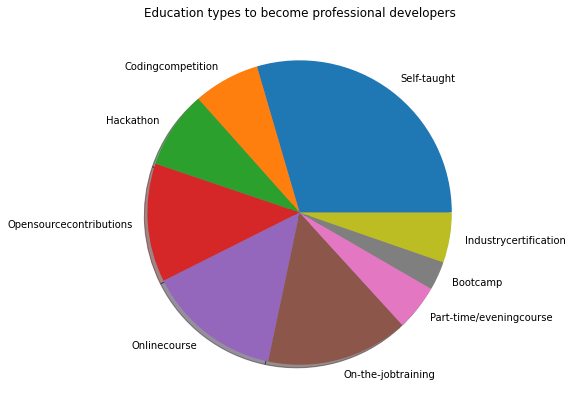

In [11]:
plt.subplots(figsize = (7,7))
plt.pie(dict(Counter(educationtype)).values(),
        labels = dict(Counter(educationtype)).keys(),
        shadow= True,startangle=0)
plt.title("Education types to become professional developers")

From the figure and pie figure, we find that over a quater of people become professional developers by self-taught. Then the following three way to become professional developers are : on the job training , oline courses, open scource contributions. 

############################################################################################################
* Education important :

<AxesSubplot:xlabel='count', ylabel='EducationImportant'>

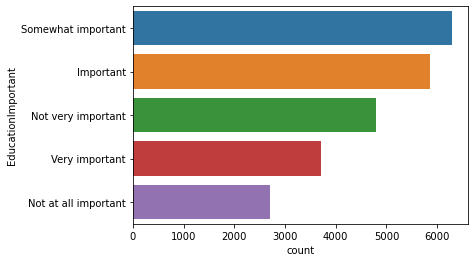

In [12]:
data.EducationImportant.unique()
sns.countplot(y = data.EducationImportant,
              order = data.EducationImportant.value_counts().index)

######################################################################################################

# **2. Effective way to find professional developer job of People with doctor degree :**

In order to answer this question , we first need to know the formal education of professional developers :
* Formal education to become professional developers :

In [13]:
# to show the formal education of professional developers 
professionla_dev.FormalEducation.value_counts()

Bachelor's degree                                                    17290
Master's degree                                                       8983
Some college/university study without earning a bachelor's degree     5390
Secondary school                                                      2280
Doctoral degree                                                        791
Professional degree                                                    543
I prefer not to answer                                                 389
I never completed any formal education                                 261
Primary/elementary school                                              204
Name: FormalEducation, dtype: int64

Text(0.5, 1.0, 'Formal education to become professional developers')

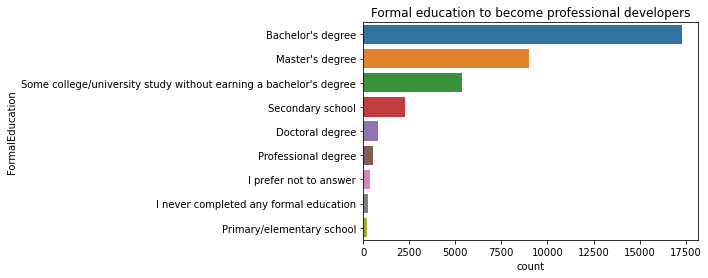

In [14]:
# to plot the bar chart to show the inforamtion of formal education of professional developers 
sns.countplot(y = professionla_dev.FormalEducation,
             order = professionla_dev.FormalEducation.value_counts().index)
plt.title("Formal education to become professional developers")

By analyzing the figure, we find most professional developers are with bachelor's degree.

In [15]:
# to select the data of professionla developers with doctoral degree 
doctor_degree = data.loc[data.FormalEducation == "Doctoral degree"]

Text(0.5, 1.0, 'Professional in Doctor degree ')

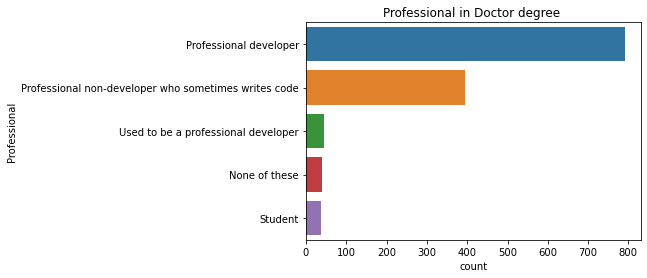

In [16]:
# to show the bar plot of the professional of people with doctor degree 
doctor_degree.Professional.value_counts()
sns.countplot(y = doctor_degree.Professional,
              order = doctor_degree.Professional.value_counts().index)
plt.title("Professional in Doctor degree ")

From the analysis,we can know only some people with doctor degree work as professinal developer. 

In [17]:
# to select the data of people with doctor degree to become professional developer as our target analysis group 
dev_doc_degree = doctor_degree.loc[doctor_degree.Professional == "Professional developer"]

In [18]:
# to show the ways to find jobs of  our target group 
dev_doc_degree.LearnedHiring.value_counts()

A friend, family member, or former colleague told me                            110
I was contacted directly by someone at the company (e.g. internal recruiter)     91
An external recruiter or headhunter                                              57
A general-purpose job board                                                      52
I visited the company's Web site and found a job listing there                   36
Some other way                                                                   35
A tech-specific job board                                                        21
A career fair or on-campus recruiting event                                      13
Name: LearnedHiring, dtype: int64

Text(0.5, 1.0, 'Ways to find job of doctors to become professional developers ')

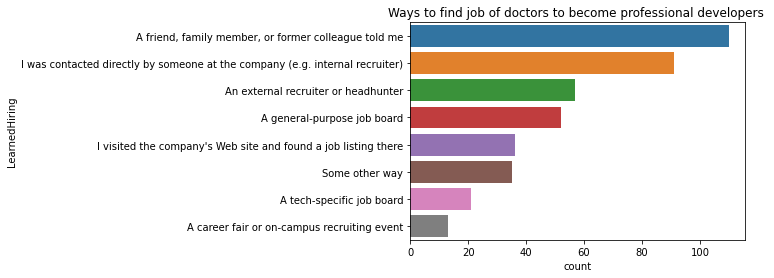

In [19]:
# plot the bar and pie chart to show the information distinctly
sns.countplot(y = dev_doc_degree.LearnedHiring,
              order = dev_doc_degree.LearnedHiring.value_counts().index)
plt.title("Ways to find job of doctors to become professional developers ")

Text(0.5, 1.0, 'Ways to find job of doctors to become professional developers')

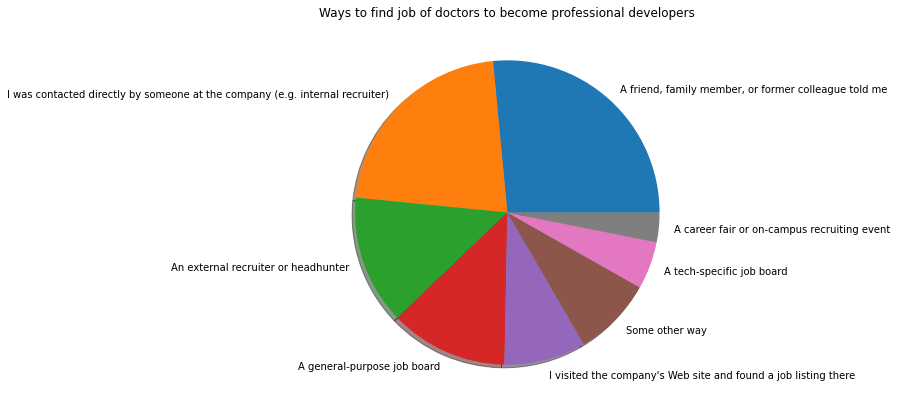

In [20]:
plt.subplots(figsize = (7,7))
plt.pie(dev_doc_degree.LearnedHiring.value_counts(),
        labels = dev_doc_degree.LearnedHiring.value_counts().index,
        shadow= True,startangle=0)
plt.title("Ways to find job of doctors to become professional developers")

From the analysis of people with doctor degree who's willing to be professional developers, the most effective way to find new job is the recomadation from friends, family members and old colleagues. A internal recruiter is also second effective way. 

# 3. which company type should people with Phd degree get higher job satisfaction?

In [21]:
# to explore the company type of our target group 
dev_doc_degree.CompanyType.unique()

array(['Venture-funded startup', 'Publicly-traded corporation',
       'Non-profit/non-governmental organization or private school/university',
       'Government agency or public school/university',
       'State-owned company', 'Pre-series A startup',
       'Privately-held limited company, not in startup mode',
       "I don't know", 'I prefer not to answer', nan,
       'Sole proprietorship or partnership, not in startup mode',
       'Something else'], dtype=object)

Text(0.5, 1.0, 'Company types of Phds to become professional developers ')

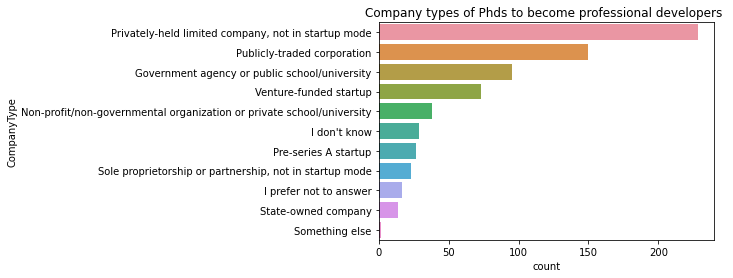

In [22]:
# to plot the company types which our target group work in 
sns.countplot(y = dev_doc_degree.CompanyType,
              order = dev_doc_degree.CompanyType.value_counts().index)
plt.title("Company types of Phds to become professional developers ")

In [23]:
# to explore the job satisfaction of our target group 
dev_doc_degree.JobSatisfaction.unique

<bound method Series.unique of 19        8.0
83        5.0
105      10.0
268       5.0
275       8.0
         ... 
51262     5.0
51278     8.0
51315     7.0
51345     5.0
51353     0.0
Name: JobSatisfaction, Length: 791, dtype: float64>

In [24]:
# to ignore the missing value and group the job satisfaction by company types 
sati = dev_doc_degree.drop(dev_doc_degree.loc[dev_doc_degree.CompanyType.isnull()].index)
sati = sati[['JobSatisfaction','CompanyType']].groupby("CompanyType").describe()
sati = sati.JobSatisfaction
sati.drop(['count','std','25%','50%','75%'],axis=1)

,mean,min,max
CompanyType,,,
Government agency or public school/university,7.505376,0.0,10.0
I don't know,7.068966,2.0,10.0
I prefer not to answer,8.125000,5.0,10.0
Non-profit/non-governmental organization or private school/university,7.189189,2.0,10.0
Pre-series A startup,7.851852,3.0,10.0
"Privately-held limited company, not in startup mode",7.462555,1.0,10.0
Publicly-traded corporation,7.194631,0.0,10.0
"Sole proprietorship or partnership, not in startup mode",7.739130,5.0,10.0
Something else,0.000000,0.0,0.0


To explore the new variabble :

In [25]:
type(sati)

pandas.core.frame.DataFrame

In [26]:
sati.index

Index(['Government agency or public school/university', 'I don't know',
       'I prefer not to answer',
       'Non-profit/non-governmental organization or private school/university',
       'Pre-series A startup',
       'Privately-held limited company, not in startup mode',
       'Publicly-traded corporation',
       'Sole proprietorship or partnership, not in startup mode',
       'Something else', 'State-owned company', 'Venture-funded startup'],
      dtype='object', name='CompanyType')

In [27]:
sati['mean']

CompanyType
Government agency or public school/university                            7.505376
I don't know                                                             7.068966
I prefer not to answer                                                   8.125000
Non-profit/non-governmental organization or private school/university    7.189189
Pre-series A startup                                                     7.851852
Privately-held limited company, not in startup mode                      7.462555
Publicly-traded corporation                                              7.194631
Sole proprietorship or partnership, not in startup mode                  7.739130
Something else                                                           0.000000
State-owned company                                                      6.500000
Venture-funded startup                                                   7.643836
Name: mean, dtype: float64

In [28]:
sati[['max','min']]

,max,min
CompanyType,,
Government agency or public school/university,10.0,0.0
I don't know,10.0,2.0
I prefer not to answer,10.0,5.0
Non-profit/non-governmental organization or private school/university,10.0,2.0
Pre-series A startup,10.0,3.0
"Privately-held limited company, not in startup mode",10.0,1.0
Publicly-traded corporation,10.0,0.0
"Sole proprietorship or partnership, not in startup mode",10.0,5.0
Something else,0.0,0.0


Text(0.5, 1.0, 'Average job satisfaction of Phds worked as professional developers in different company type')

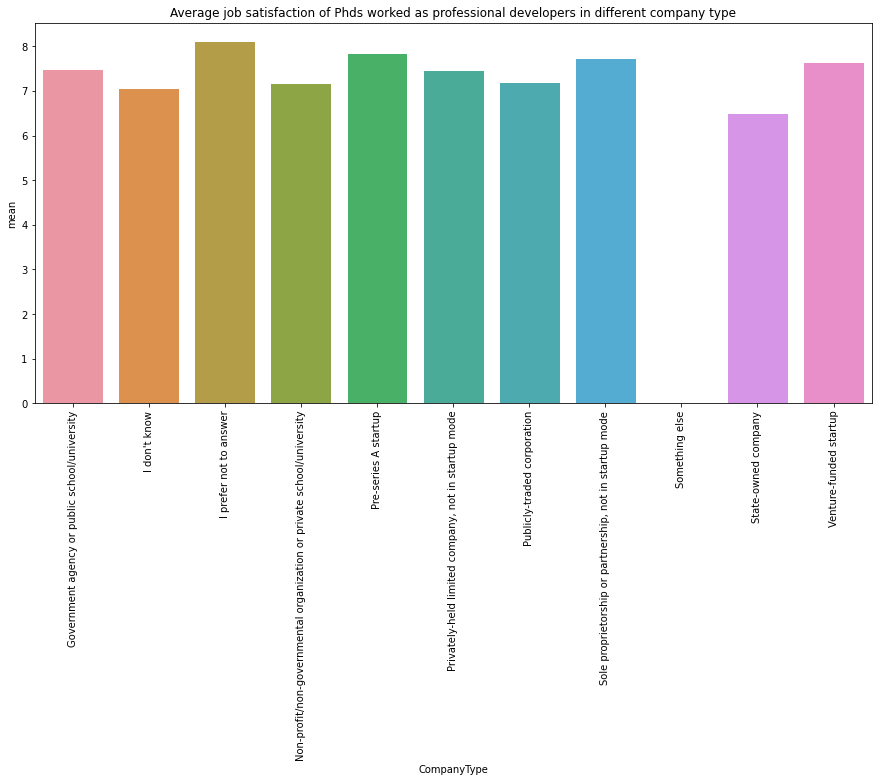

In [29]:
# to plot the mean value of job satisfaction of our target group in different company types
plt.subplots(figsize = (15,7))
sns.set_style("whitegrid")
ax = sns.barplot(x = sati.index,y = sati['mean'])
ax.set_xticklabels(sati.index,rotation = 90)
plt.title("Average job satisfaction of Phds worked as professional developers in different company type")

From the bar plot, we can know that Phds can get high average job satisfaction with around 7,no matter which type of companies they choose to work.Only the state owned companpy has the lowest job satisfaction below 7. 

# Data modeling 
There's no date modelling needed to answer the question.